In [2]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode = True, min_detection_confidence=0.3, model_complexity = 2)
mp_drawing = mp.solutions.drawing_utils

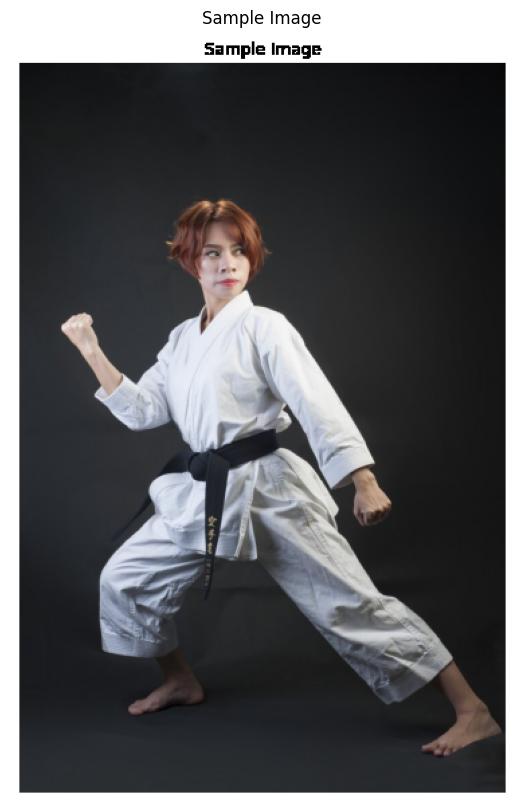

In [4]:
sample_img = cv2.imread('media/image-32.png')
plt.figure(figsize=[10,10])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [5]:
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_RGB2BGR))
if results.pose_landmarks:
    for i in range(25):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value ]}')

NOSE:
x: 0.43035873770713806
y: 0.30670857429504395
z: -0.8222177624702454
visibility: 1.0

LEFT_EYE_INNER:
x: 0.4370790719985962
y: 0.28946858644485474
z: -0.785569965839386
visibility: 1.0

LEFT_EYE:
x: 0.44871777296066284
y: 0.28817427158355713
z: -0.7863096594810486
visibility: 1.0

LEFT_EYE_OUTER:
x: 0.4568997919559479
y: 0.28718721866607666
z: -0.7860340476036072
visibility: 1.0

RIGHT_EYE_INNER:
x: 0.40751808881759644
y: 0.2918951213359833
z: -0.7563081383705139
visibility: 1.0

RIGHT_EYE:
x: 0.3973900377750397
y: 0.29253047704696655
z: -0.7568690776824951
visibility: 1.0

RIGHT_EYE_OUTER:
x: 0.3862594962120056
y: 0.2932034730911255
z: -0.757047712802887
visibility: 0.9999998807907104

LEFT_EAR:
x: 0.46648672223091125
y: 0.2927407920360565
z: -0.5394245386123657
visibility: 1.0

RIGHT_EAR:
x: 0.3693486452102661
y: 0.3001212477684021
z: -0.4027956426143646
visibility: 0.9999997615814209

MOUTH_LEFT:
x: 0.44793933629989624
y: 0.32048413157463074
z: -0.7234309315681458
visibility: 

In [6]:
image_height, image_width, _ =sample_img.shape
if results.pose_landmarks:
    for i in range(2):
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x*image_width}')
        print(f'y:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y*image_height}')
        print(f'z:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z*image_width}')
        print(f'visibilty:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x:161.8148853778839
y:176.05072164535522
z:-309.15387868881226
visibilty:1.0

LEFT_EYE_INNER:
x:164.34173107147217
y:166.15496861934662
z:-295.37430715560913
visibilty:1.0



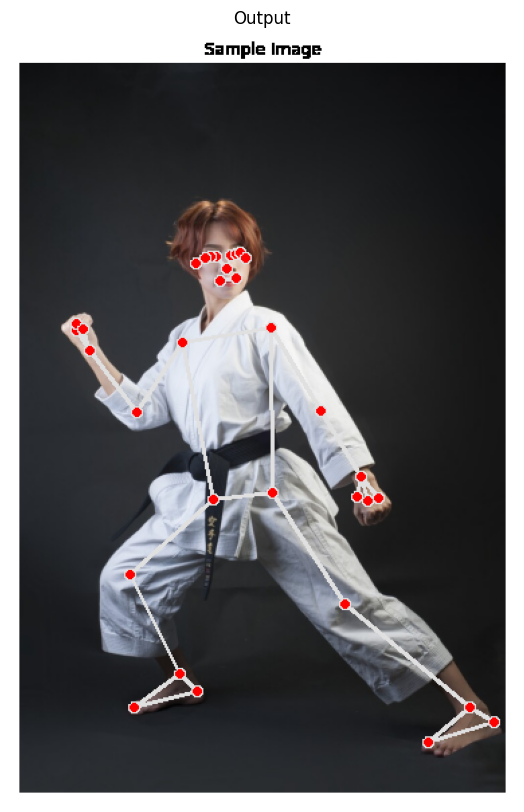

In [7]:
img_copy = sample_img.copy()
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    fig = plt.figure(figsize=[10,10])
    
    plt.title("Output"); plt.axis('off');plt.imshow(img_copy[:,:,::-1]); plt.show()

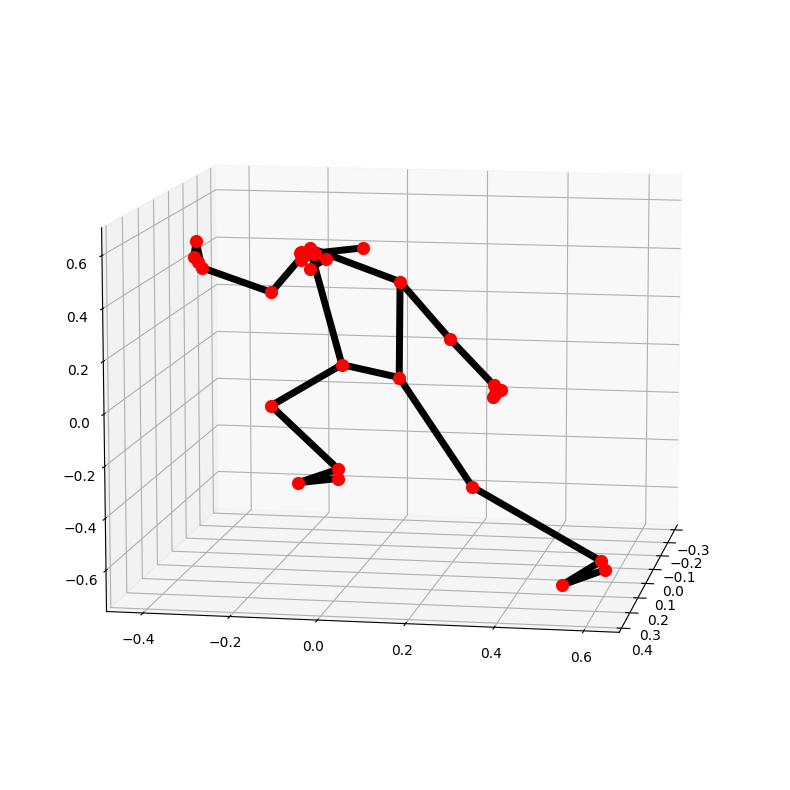

In [8]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [9]:

def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[30,30])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

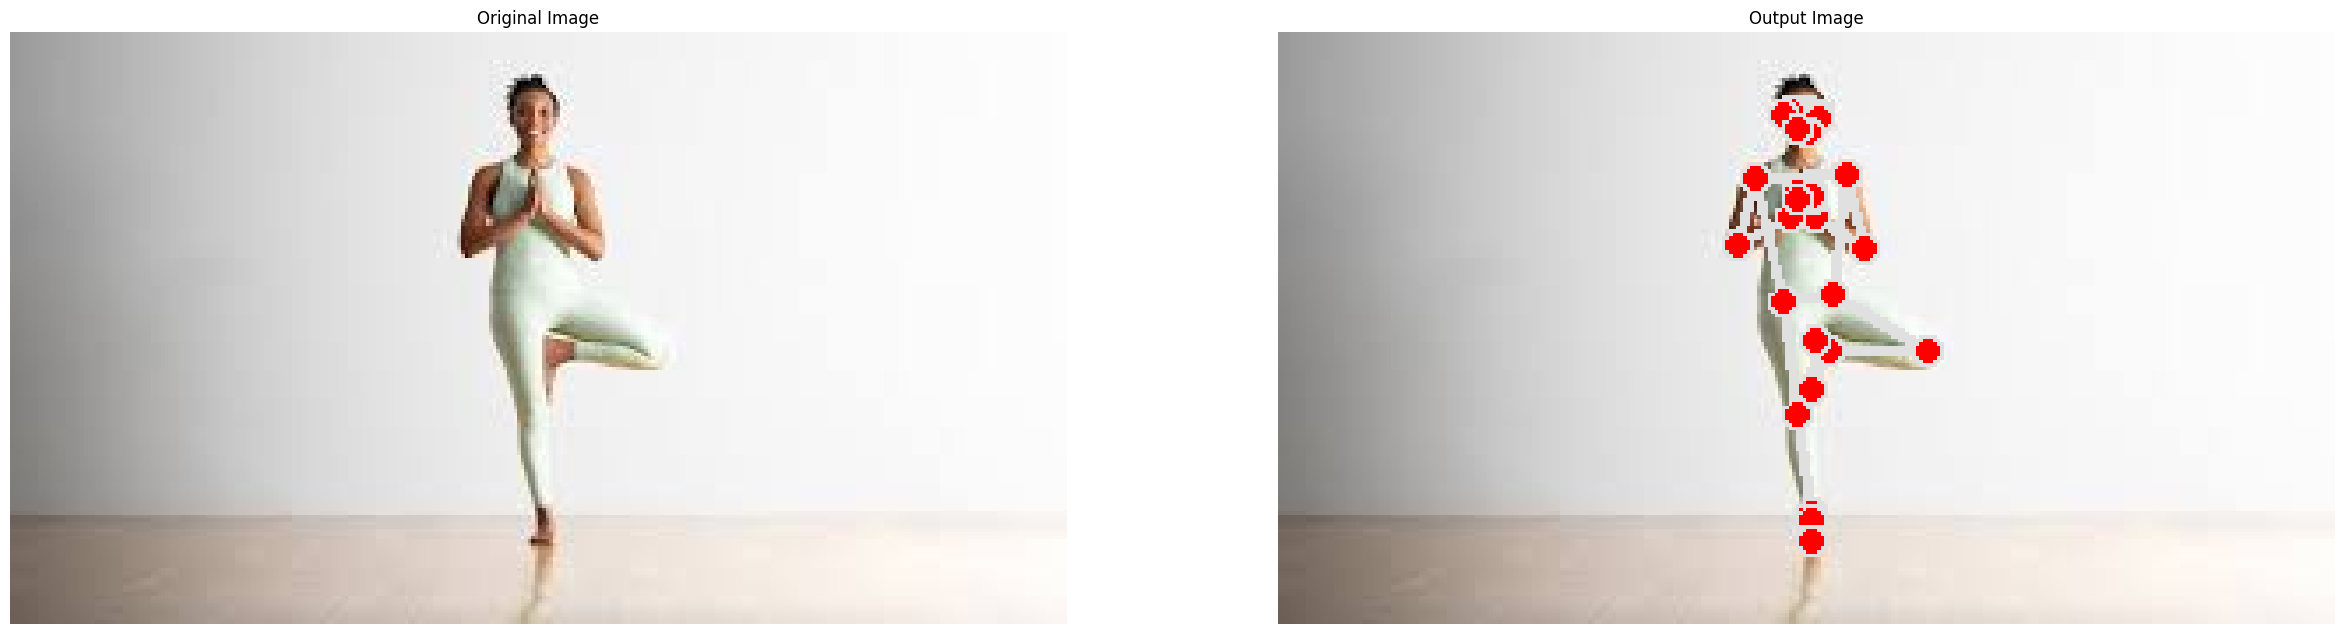

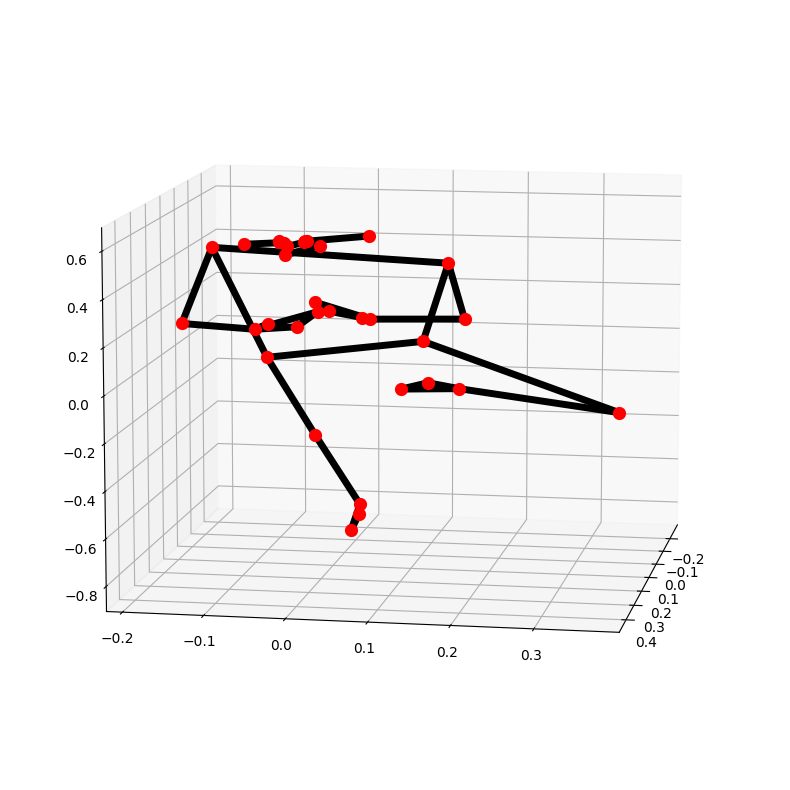

In [10]:
image = cv2.imread('media/sample.png')
detectPose(image,pose,display=True)

In [11]:
#Setup Pose Fucntion for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5,model_complexity=1)

#Initialize the videocapture to read from web cam
video = cv2.VideoCapture(0)

#resizing purpose
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)

#initialize videocapture to read from video
#set video size
video.set(3,1280)
video.set(4,960)

time1=0

#Initialize until the video is accepted succesfully
while video.isOpened():
    ok, frame=video.read()
    if not ok:
        break
    
    #flip horizontally
    frame = cv2.flip(frame,1)
    
    frame_height, frame_width,_=frame.shape
    
    #resize
    frame=cv2.resize(frame,(int(frame_width*(640/frame_height)),640))
    
    #landmark detection
    frame,_=detectPose(frame,pose_video,display=False)
    
    time2=time()
    if(time2-time1)>0:
        frame_per_second=1.0/(time2-time1)
        cv2.putText(frame,'FPS:{}'.format(int(frame_per_second)),(10,30),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),3)
    time1=time2
    cv2.imshow('Pose Detection',frame)
    
    #wait until a key is pressed
    k=cv2.waitKey(1) & 0xFF
    
    #check if esc is pressed
    if(k==27):
        break
video.release()
cv2.destroyAllWindows()

In [12]:
def calculateAngle(landmark1, landmark2, landmark3):

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
 
    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle< 0:
 
        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [13]:
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

 
# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [14]:

def classifyPose(landmarks, output_image, display=False):
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'
 
    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
 
    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
 
    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
 
    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle<195 and right_elbow_angle > 165 and right_elbow_angle < 195:
 
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle< 110 and right_shoulder_angle >80 and right_shoulder_angle <110:
 
    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------
 
            # Check if one leg is straight.
            if left_knee_angle >165 and left_knee_angle< 195 or right_knee_angle > 165 and right_knee_angle< 195:
 
                # Check if the other leg is bended at the required angle.
                if left_knee_angle>90 and left_knee_angle < 120 or right_knee_angle> 90 and right_knee_angle < 120:
 
                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose' 
                        
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the T pose.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
 
                # Specify the label of the pose that is tree pose.
                label = 'T Pose'
 
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the tree pose.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
 
        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:
 
            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'
                
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0, 255, 0)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

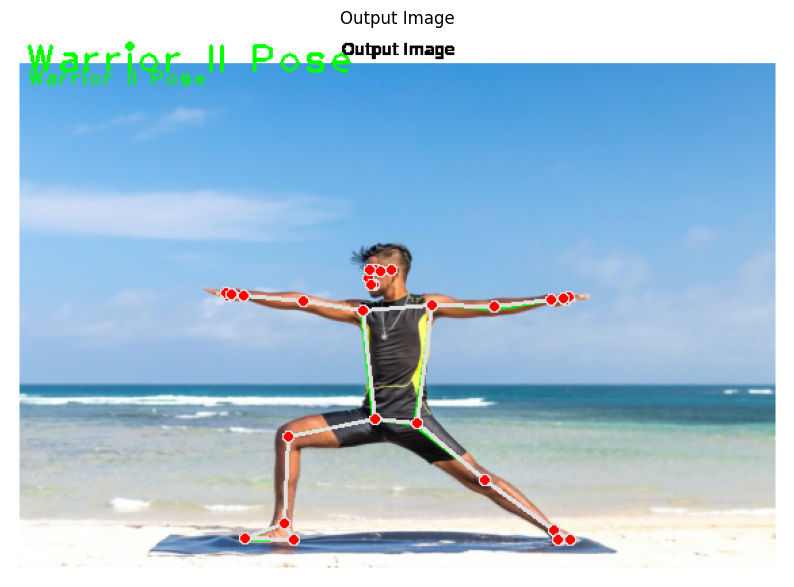

In [15]:

# Read a sample image and perform pose classification on it.
image = cv2.imread('media/warriorIIpose.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [ ]:
camera_video = cv2.VideoCapture(0)
 
# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)
 
# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Continue to the next iteration to read the next frame and ignore the empty camera frame.
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    # Check if the landmarks are detected.
    if landmarks:
        
        # Perform the Pose Classification.
        frame, _ = classifyPose(landmarks, frame, display=False)
    
    # Display the frame.
    cv2.imshow('Pose Classification', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k=cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break
 
# Release the VideoCapture object and close the windows.
camera_video.release()
cv2.destroyAllWindows()